In [145]:
import json

import funcy
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from skmultilearn.model_selection import iterative_train_test_split

from super_pycocotools.coco import SuperCOCO

In [105]:
super_ann_file = './datasets.json'

#initialize COCO api
coco = SuperCOCO(super_ann_file)

processing LogoDet
train data
loading annotations into memory...
Done (t=0.97s)
creating index...
index created!


In [106]:
len(coco.LogoDet.train.getImgIds())

158654

In [107]:
category_ids = coco.LogoDet.train.getCatIds()
categories = coco.LogoDet.train.loadCats(category_ids)
category_name = [category['name'] for category in categories]

In [108]:
coco.LogoDet.train.loadAnns(1)

[{'bbox': [67, 39, 151, 36],
  'area': 5436,
  'segmentation': [],
  'iscrowd': 0,
  'image_id': 1,
  'category_id': 1,
  'id': 1}]

In [109]:
category_count = {}
for id in coco.LogoDet.train.getAnnIds():
    annotation = coco.LogoDet.train.loadAnns(id)[0]
    category = coco.LogoDet.train.loadCats(annotation['category_id'])[0]['name']
    if category not in category_count:
        category_count[category] = 1
    else:
        category_count[category] += 1

In [110]:
category_name = sorted(category_name, key=lambda x: category_count[x])

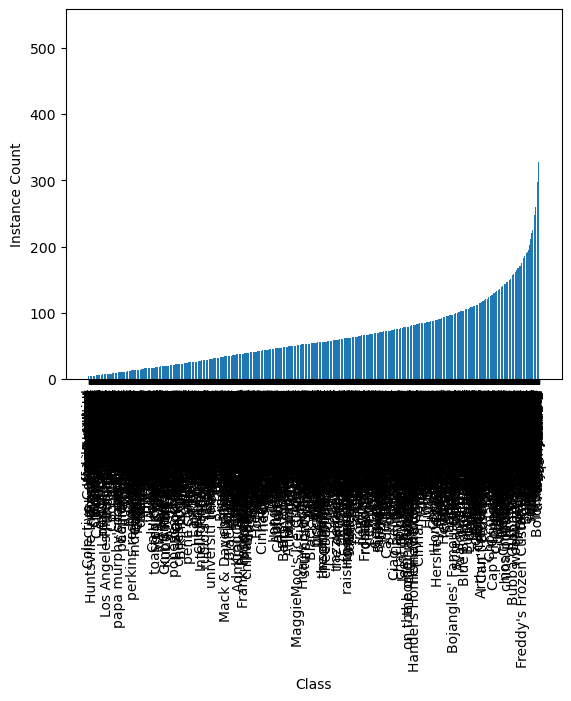

In [111]:
plt.bar(category_name, [category_count[name] for name in category_name])
plt.xlabel('Class')
plt.ylabel('Instance Count')
plt.xticks(rotation=90)
plt.show()

In [112]:
minority_count = {}
for key, value in category_count.items():
    if value < 30:
        minority_count.update({key: value})

In [113]:
minority_name = [name for name in category_name if name in minority_count]
minority_name = sorted(minority_name, key=lambda x: minority_count[x])

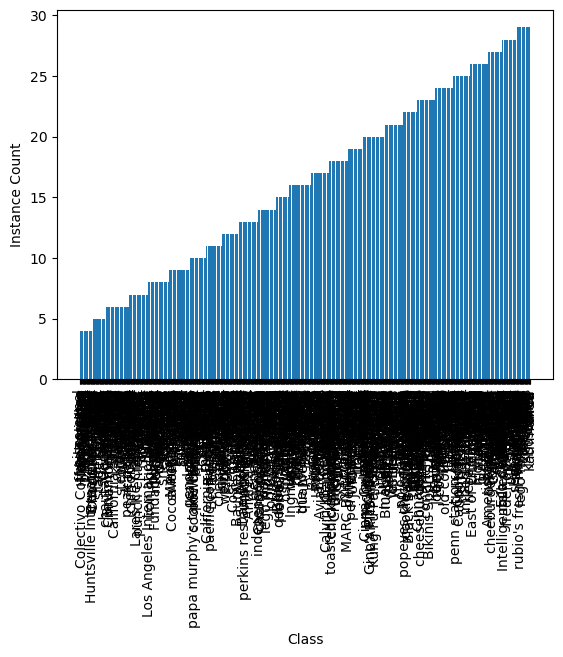

In [114]:
plt.bar(minority_name, [minority_count[name] for name in minority_name])
plt.xlabel('Class')
plt.ylabel('Instance Count')
plt.xticks(rotation=90)
plt.show()

In [115]:
len(minority_name)

800

In [119]:
annotation_ids = coco.LogoDet.train.getAnnIds()
annotations = coco.LogoDet.train.loadAnns(annotation_ids)

In [120]:
len(annotations)

194265

In [138]:
majority_count = {}
for key, value in category_count.items():
    if value >= 30:
        majority_count.update({key: value})
majority_name = [name for name in category_name if name in majority_count]
majority_name = sorted(majority_name, key=lambda x: majority_count[x])

In [139]:
majority_count

{'british eagle': 46,
 'brompton bicycle': 65,
 'moots cycles': 121,
 'atlas air': 104,
 'Air Choice One Airlines': 35,
 'racetrac': 36,
 'huffy': 37,
 'pakistan state oil': 152,
 'Atala': 51,
 'lifan-1': 190,
 'lifan-2': 74,
 'Isuzu-1': 62,
 'Isuzu-2': 34,
 'yutong-1': 153,
 'yutong-3': 189,
 'yutong-2': 96,
 'yonho-2': 35,
 'Bilisten': 77,
 'ski-doo': 74,
 'Chery': 80,
 'marin bikes': 109,
 'Cimc-1': 116,
 'Cimc-2': 102,
 'Autovox': 41,
 'ANCAP-1': 42,
 'ANCAP-2': 120,
 'pakistan state': 77,
 'Husqvarna-1': 58,
 'Husqvarna-2': 56,
 'BMW': 54,
 'gocycle': 84,
 'Mahindra-1': 34,
 'lambretta': 123,
 'Heinkel': 43,
 'rockshox': 135,
 'toyota': 168,
 'Infiniti': 33,
 'misc berhad': 67,
 'scania': 30,
 'ITS-1': 30,
 'ITS-2': 32,
 'petron': 98,
 'EMS': 34,
 'Hyundai-2': 86,
 'Hyundai-1': 54,
 'Amerijet International': 60,
 'Colnago': 40,
 'kia da': 158,
 'phillips cycles': 64,
 'boardman bikes': 47,
 'BUGATTI': 72,
 'seat': 81,
 'Maserati': 76,
 'bottecchia': 73,
 'terpel': 86,
 'Citroen': 

In [ ]:
annotation_categories = funcy.lmap(lambda a: int(a['category_id']), annotations)
annotation_categories = funcy.lremove(lambda i: annotation_categories.count(i) <= 30, annotation_categories)

In [ ]:
annotations = funcy.lremove(lambda i: i['category_id'] not in annotation_categories, annotations)

In [ ]:
len(annotations)

In [ ]:
category_ids = coco.LogoDet.train.getCatIds()
categories = coco.LogoDet.train.loadCats(category_ids)
category_name = [category['name'] for category in categories]

In [75]:
X_train, y_train, X_test, y_test = iterative_train_test_split(np.array([annotations]).T,
                                                              np.array([annotation_categories]).T, test_size=0.2)

In [91]:
X_train

array([[{'bbox': [67, 39, 151, 36], 'area': 5436, 'segmentation': [], 'iscrowd': 0, 'image_id': 1, 'category_id': 1, 'id': 1}],
       [{'bbox': [54, 168, 372, 48], 'area': 17856, 'segmentation': [], 'iscrowd': 0, 'image_id': 3, 'category_id': 1, 'id': 3}],
       [{'bbox': [135, 105, 167, 36], 'area': 6012, 'segmentation': [], 'iscrowd': 0, 'image_id': 5, 'category_id': 1, 'id': 5}],
       ...,
       [{'bbox': [162, 125, 171, 96], 'area': 16416, 'segmentation': [], 'iscrowd': 0, 'image_id': 158652, 'category_id': 2993, 'id': 194263}],
       [{'bbox': [14, 85, 164, 68], 'area': 11152, 'segmentation': [], 'iscrowd': 0, 'image_id': 158653, 'category_id': 2993, 'id': 194264}],
       [{'bbox': [26, 70, 162, 67], 'area': 10854, 'segmentation': [], 'iscrowd': 0, 'image_id': 158654, 'category_id': 2993, 'id': 194265}]],
      dtype=object)

In [85]:
category_count = {}
for annotation in X_train:
    category = coco.LogoDet.train.loadCats(annotation[0]['category_id'])[0]['name']
    if category not in category_count:
        category_count[category] = 1
    else:
        category_count[category] += 1

In [87]:
len(category_count)

2169

In [88]:
category_name = [name for name in category_name if name in category_count]
category_name = sorted(category_name, key=lambda x: category_count[x])

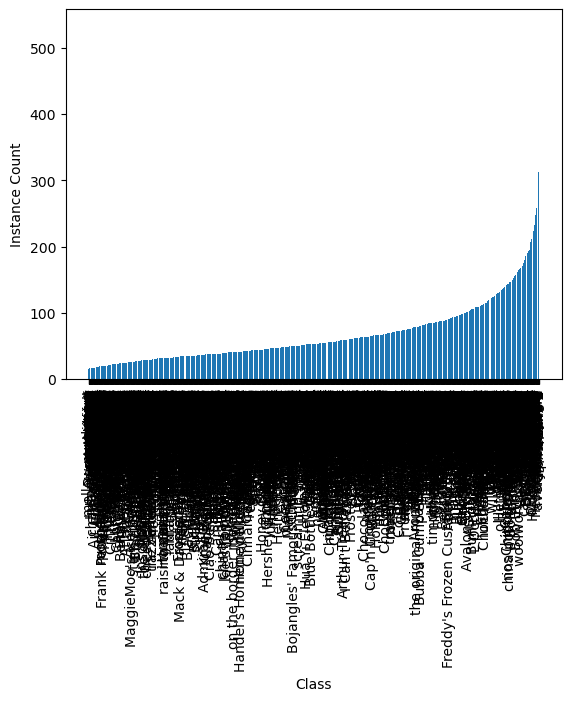

In [90]:
plt.bar(category_name, [category_count[name] for name in category_name])
plt.xlabel('Class')
plt.ylabel('Instance Count')
plt.xticks(rotation=90)
plt.show()

In [77]:
X_test

array([[{'bbox': [147, 109, 164, 25], 'area': 4100, 'segmentation': [], 'iscrowd': 0, 'image_id': 2, 'category_id': 1, 'id': 2}],
       [{'bbox': [66, 320, 236, 96], 'area': 22656, 'segmentation': [], 'iscrowd': 0, 'image_id': 4, 'category_id': 1, 'id': 4}],
       [{'bbox': [97, 72, 307, 96], 'area': 29472, 'segmentation': [], 'iscrowd': 0, 'image_id': 6, 'category_id': 1, 'id': 6}],
       ...,
       [{'bbox': [33, 92, 209, 117], 'area': 24453, 'segmentation': [], 'iscrowd': 0, 'image_id': 63691, 'category_id': 1144, 'id': 76963}],
       [{'bbox': [18, 80, 342, 60], 'area': 20520, 'segmentation': [], 'iscrowd': 0, 'image_id': 63693, 'category_id': 1144, 'id': 76965}],
       [{'bbox': [169, 149, 244, 42], 'area': 10248, 'segmentation': [], 'iscrowd': 0, 'image_id': 63695, 'category_id': 1145, 'id': 76967}]],
      dtype=object)

In [140]:
logo_split = {}
for ann_id in coco.LogoDet.train.getAnnIds():
    annotation = coco.LogoDet.train.loadAnns(ann_id)[0]
    cat_id = annotation['category_id']
    im_id = annotation['image_id']
    if cat_id not in logo_split:
        logo_split[cat_id] = []
    logo_split[cat_id].append(im_id)

In [146]:
train = []
test = []
for cat_id, im_id in logo_split.items():
    x_train, x_test = train_test_split(im_id, train_size=0.8)
    train += list(x_train)
    test += list(x_test)

In [154]:
annotation_ids = coco.LogoDet.train.getAnnIds()
annotations = coco.LogoDet.train.loadAnns(annotation_ids)

image_ids = coco.LogoDet.train.getImgIds()
images = coco.LogoDet.train.loadImgs(image_ids)

In [ ]:
train_annotations = funcy.lfilter(lambda a: int(a['image_id']) in train, annotations)
train_images = funcy.lfilter(lambda i: int(i['id']) in train, images)

test_annotations = funcy.lfilter(lambda a: int(a['image_id']) in test, annotations)
test_images = funcy.lfilter(lambda i: int(i['id']) in test, images)

In [ ]:
category_ids = coco.LogoDet.train.getCatIds()
categories = coco.LogoDet.train.loadCats(image_ids)

In [152]:
trainjson = "./instances_train2017.json"

with open(trainjson, 'wt', encoding='UTF-8') as coco:
    json.dump({'images': train_images, 'annotations': train_annotations, 'categories': categories}, coco, indent=2, sort_keys=True)

testjson = "./instances_test2017.json"

with open(testjson, 'wt', encoding='UTF-8') as coco:
    json.dump({'images': test_images, 'annotations': test_annotations, 'categories': categories}, coco, indent=2, sort_keys=True)

[{'bbox': [67, 39, 151, 36],
  'area': 5436,
  'segmentation': [],
  'iscrowd': 0,
  'image_id': 1,
  'category_id': 1,
  'id': 1},
 {'bbox': [66, 320, 236, 96],
  'area': 22656,
  'segmentation': [],
  'iscrowd': 0,
  'image_id': 4,
  'category_id': 1,
  'id': 4},
 {'bbox': [135, 105, 167, 36],
  'area': 6012,
  'segmentation': [],
  'iscrowd': 0,
  'image_id': 5,
  'category_id': 1,
  'id': 5},
 {'bbox': [32, 323, 190, 25],
  'area': 4750,
  'segmentation': [],
  'iscrowd': 0,
  'image_id': 7,
  'category_id': 1,
  'id': 7},
 {'bbox': [57, 189, 374, 46],
  'area': 17204,
  'segmentation': [],
  'iscrowd': 0,
  'image_id': 8,
  'category_id': 1,
  'id': 8},
 {'bbox': [204, 188, 153, 25],
  'area': 3825,
  'segmentation': [],
  'iscrowd': 0,
  'image_id': 10,
  'category_id': 1,
  'id': 10},
 {'bbox': [35, 142, 170, 109],
  'area': 18530,
  'segmentation': [],
  'iscrowd': 0,
  'image_id': 11,
  'category_id': 1,
  'id': 11},
 {'bbox': [85, 200, 164, 32],
  'area': 5248,
  'segmentatio